In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
#read the data
path="/content/drive/MyDrive/Dataset/Reviews.csv"
df=pd.read_csv(path)

In [ ]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
 df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [ ]:
df.shape

(568454, 10)

In [ ]:
df=df.head(600)

In [ ]:
 df.shape

(600, 10)

# **QUICK DEA**

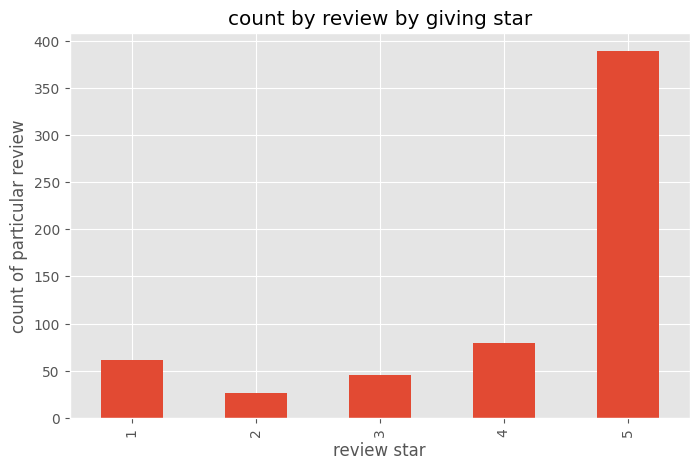

In [ ]:
z=df['Score'].value_counts().sort_index().plot(kind='bar',title="count by review by giving star",figsize=(8,5))
plt.xlabel('review star')
plt.ylabel("count of particular review")
plt.show()

In [ ]:
ex=df['Text'][50]
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
tokens=nltk.word_tokenize(ex)

In [ ]:
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
tagged =nltk.pos_tag(tokens)
tagged[:10]
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()
nltk.download('vader_lexicon')

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.auto import tqdm
sia=SentimentIntensityAnalyzer()

In [ ]:
 sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [ ]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
ans={}
for index,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=index
    ans[myid]=sia.polarity_scores(text)


  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
vaders=pd.DataFrame(ans).T

In [ ]:
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df,how ='left',left_index=True,right_index=True)
vaders.head(3)

,id,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


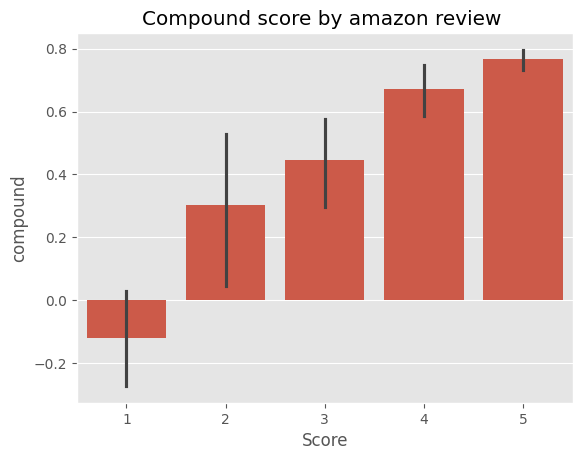

In [ ]:
q=sns.barplot(data=vaders,x='Score',y='compound')
q.set_title('Compound score by amazon review ')
plt.show()

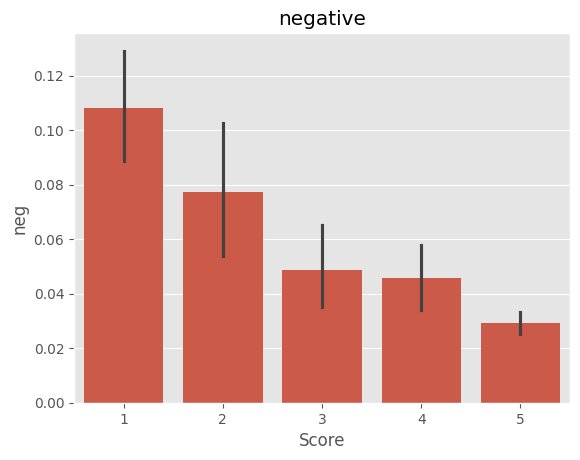

In [ ]:
q_=sns.barplot(data=vaders,x='Score',y='neg')
q_=q_.set_title('negative')
plt.show()


** **bold text**Robetra pretrained model**


```
# This is formatted as code
```



In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL="cardiffnlp/twitter-roberta-base-sentiment"

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
exp_=df['Text'][9]

In [ ]:
def solve(example):
    encoded_text=tokenizer(exp_,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]


    }
    return scores_dict

In [ ]:
res={}

for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    vaders_result=sia.polarity_scores(text)

    roberta_result=solve(text)
    both={**vaders_result,**roberta_result}
    res[myid]=both

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
both

{'neg': 0.051,
 'neu': 0.693,
 'pos': 0.257,
 'compound': 0.9842,
 'roberta_neg': 0.0031034567,
 'roberta_neu': 0.05591218,
 'roberta_pos': 0.9409843}

In [ ]:
result_df=pd.DataFrame(res).T

In [ ]:
result_df

,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
1,0.000,0.695,0.305,0.9441,0.003103,0.055912,0.940984
2,0.138,0.862,0.000,-0.5664,0.003103,0.055912,0.940984
3,0.091,0.754,0.155,0.8265,0.003103,0.055912,0.940984
4,0.000,1.000,0.000,0.0000,0.003103,0.055912,0.940984
5,0.000,0.552,0.448,0.9468,0.003103,0.055912,0.940984
...,...,...,...,...,...,...,...
596,0.022,0.845,0.133,0.9206,0.003103,0.055912,0.940984
597,0.000,0.797,0.203,0.8567,0.003103,0.055912,0.940984
598,0.063,0.859,0.078,0.4101,0.003103,0.055912,0.940984
599,0.146,0.571,0.283,0.8802,0.003103,0.055912,0.940984


In [ ]:
result_df=result_df.reset_index(drop=True).rename(columns={'index':'Id'})
result_df

,Id,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
0,0,1,0.000,0.695,0.305,0.9441,0.003103,0.055912,0.940984
1,1,2,0.138,0.862,0.000,-0.5664,0.003103,0.055912,0.940984
2,2,3,0.091,0.754,0.155,0.8265,0.003103,0.055912,0.940984
3,3,4,0.000,1.000,0.000,0.0000,0.003103,0.055912,0.940984
4,4,5,0.000,0.552,0.448,0.9468,0.003103,0.055912,0.940984
...,...,...,...,...,...,...,...,...,...
595,595,596,0.022,0.845,0.133,0.9206,0.003103,0.055912,0.940984
596,596,597,0.000,0.797,0.203,0.8567,0.003103,0.055912,0.940984
597,597,598,0.063,0.859,0.078,0.4101,0.003103,0.055912,0.940984
598,598,599,0.146,0.571,0.283,0.8802,0.003103,0.055912,0.940984


In [ ]:
result_df=result_df.merge(df,how='left',left_index=True,right_index=True)

In [ ]:
result_df.head(3)

,Id_x,Id_x,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Id_y,...,Id,ProductId_y,UserId_y,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y
0,0,1,0.0,0.695,0.305,0.9441,0.003103,0.055912,0.940984,1,...,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,0.138,0.862,0.0,-0.5664,0.003103,0.055912,0.940984,2,...,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,0.091,0.754,0.155,0.8265,0.003103,0.055912,0.940984,3,...,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
result_df.query('Score_y==1').sort_values('roberta_pos',ascending=False)['Text_y'].values[0]


'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [ ]:
from transformers import pipeline
sent_pipeline=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('i love you boobs')


[{'label': 'POSITIVE', 'score': 0.9998340606689453}]